## `Exchange Rate of Time Series Analysis`

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import Series
from statsmodels.tsa.stattools import adfuller
from math import sqrt
from pandas import DataFrame
from pandas import concat
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import warnings
warnings.filterwarnings("ignore")

In [45]:
dff = pd.read_csv("USD-INR.csv",index_col=0, parse_dates=True, skipinitialspace=True)
dff.head()

,Rate
Date,
2011-01-17,45.42
2011-01-18,45.45
2011-01-19,45.34
2011-01-20,45.36
2011-01-21,45.80


In [46]:
print("Shape:",dff.shape)

Shape: (3574, 1)


In [47]:
dff.isnull().sum()

Rate    0
dtype: int64

In [48]:
dff.describe()

,Rate
count,3574.000000
mean,63.085481
std,8.022905
min,43.220000
25%,59.580000
50%,64.455000
75%,68.587500
max,77.050000


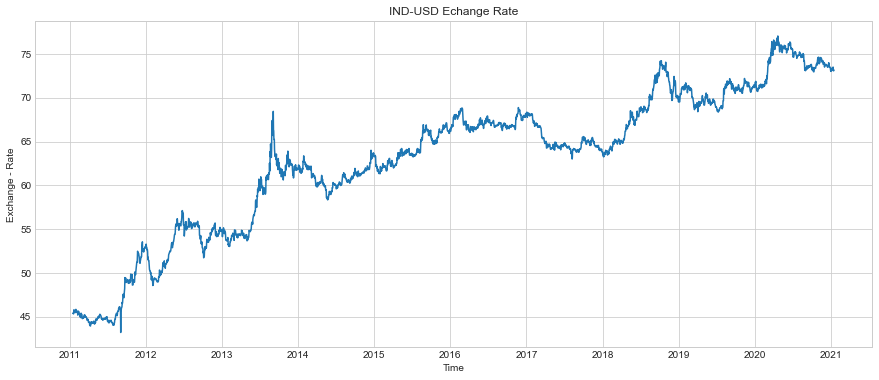

In [49]:
plt.figure(figsize=(15,6))
plt.plot(dff)
plt.title('IND-USD Echange Rate')
plt.xlabel("Time")
plt.ylabel("Exchange - Rate")
plt.show()

<AxesSubplot:>

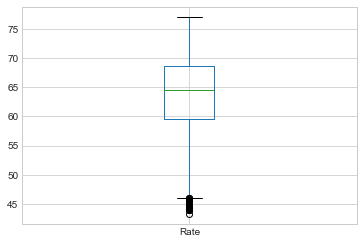

In [50]:
dff.boxplot()

In [51]:
df = dff['Rate'].resample('M').mean()
df.head()

Date
2011-01-31    45.604000
2011-02-28    45.397500
2011-03-31    44.901379
2011-04-30    44.294000
2011-05-31    44.833871
Freq: M, Name: Rate, dtype: float64

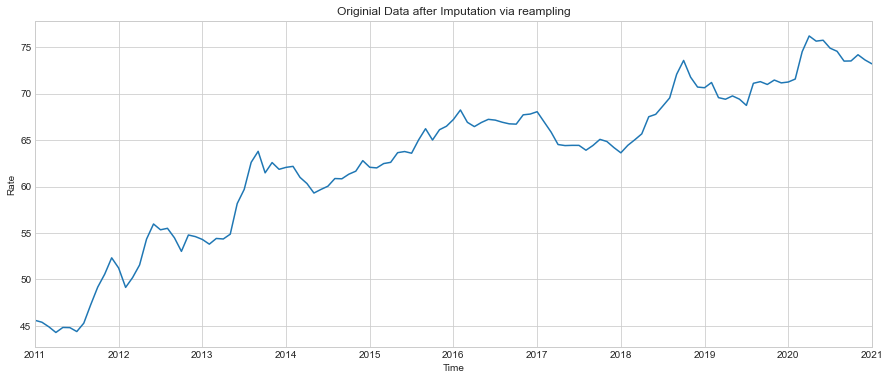

In [52]:
# Originial Data Representation
df.plot(figsize=(15, 6))
plt.title("Originial Data after Imputation via reampling")
plt.xlabel("Time")
plt.ylabel("Rate")
plt.style.use('seaborn-whitegrid')
plt.show()

### `Adfuller Test `

In [53]:
timeseries = adfuller(df)
print('ADF Statistic: %f' % timeseries[0])
print('p-value: %f' % timeseries[1])
print('Critical Values:')
for key, value in timeseries[4].items():
    print('\t%s: %.3f' % (key, value))
if timeseries[0] > timeseries[4]["5%"]:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")
else:
    print("Reject Ho - Time Series is Stationary")

ADF Statistic: -1.866192
p-value: 0.348129
Critical Values:
	1%: -3.487
	5%: -2.886
	10%: -2.580
Failed to Reject Ho - Time Series is Non-Stationary


In [54]:
X = df.values
X = np.sqrt(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] > result[4]["5%"]:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")
else:
    print("Reject Ho - Time Series is Stationary")

ADF Statistic: -2.007602
p-value: 0.283250
	1%: -3.487
	5%: -2.886
	10%: -2.580
Failed to Reject Ho - Time Series is Non-Stationary


In [55]:
data_stationery = df.diff().dropna()
result = adfuller(data_stationery)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] > result[4]["5%"]:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")
else:
    print("Reject Ho - Time Series is Stationary")

ADF Statistic: -8.421854
p-value: 0.000000
	1%: -3.487
	5%: -2.886
	10%: -2.580
Reject Ho - Time Series is Stationary


### `Creating train and test set `

In [56]:
train=df[0:90] 
test=df[90:120]

#### `Let’s visualize the data (train and test together) to know how it varies over a time period.`

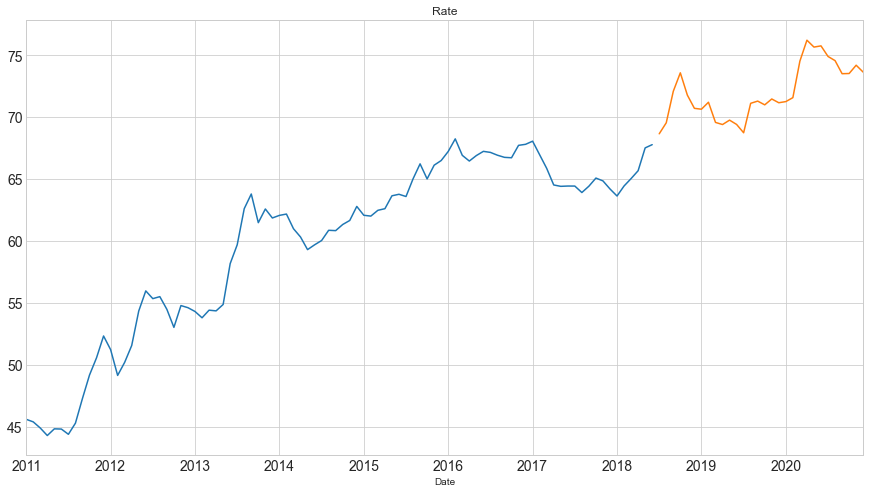

In [57]:
#Plotting data
train.plot(figsize=(15,8), title= 'Rate', fontsize=14)
test.plot(figsize=(15,8), title= 'Rate', fontsize=14)
plt.show()

### `Moving Average`

In [58]:
width = 3
lag1 = df.shift(1)
lag3 = df.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()
dataframe = concat([means, lag1, df], axis=1)
dataframe.columns = ['mean', 't-1', 't+1']
print(dataframe.head(10))

                 mean        t-1        t+1
Date                                       
2011-01-31        NaN        NaN  45.604000
2011-02-28        NaN  45.604000  45.397500
2011-03-31        NaN  45.397500  44.901379
2011-04-30        NaN  44.901379  44.294000
2011-05-31  45.300960  44.294000  44.833871
2011-06-30  44.864293  44.833871  44.817333
2011-07-31  44.676417  44.817333  44.393871
2011-08-31  44.648401  44.393871  45.293000
2011-09-30  44.681692  45.293000  47.290800
2011-10-31  44.834735  47.290800  49.177308


In [59]:
df = pd.DataFrame(df)

Test RMSE: 7.012


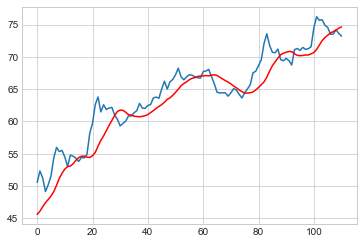

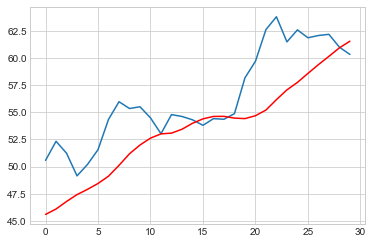

In [60]:
# prepare situation
X = df.Rate
window = 10
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)

error = mean_squared_error(test, predictions)
print('Test RMSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot
pyplot.plot(test[0:30])
pyplot.plot(predictions[0:30], color='red')
pyplot.show()

### `ARIMA`

                             ARIMA Model Results                              
Dep. Variable:                 D.Rate   No. Observations:                  120
Model:                 ARIMA(5, 1, 1)   Log Likelihood                -169.623
Method:                       css-mle   S.D. of innovations              0.993
Date:                Tue, 19 Jan 2021   AIC                            355.247
Time:                        09:47:37   BIC                            377.547
Sample:                    02-28-2011   HQIC                           364.303
                         - 01-31-2021                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2313      0.100      2.317      0.020       0.036       0.427
ar.L1.D.Rate    -0.5043      0.246     -2.053      0.040      -0.986      -0.023
ar.L2.D.Rate     0.1102      0.117      0.94

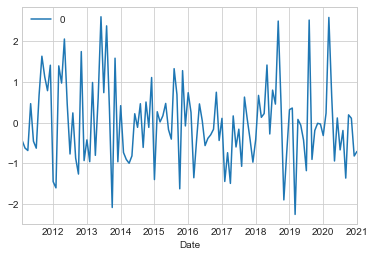

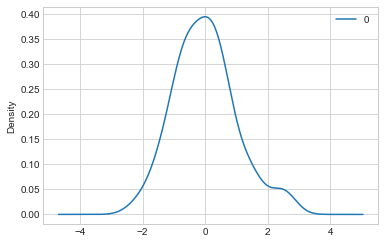

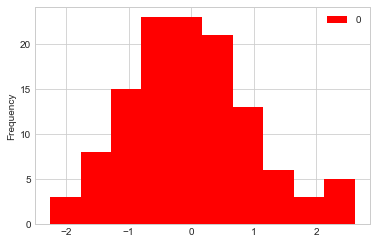

                0
count  120.000000
mean    -0.001508
std      0.997847
min     -2.252999
25%     -0.709806
50%     -0.043123
75%      0.485477
max      2.608577


In [61]:
x = df['Rate']
# fit model
model = ARIMA(x, order=(5,1,1))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

residuals.plot(kind = 'hist', color = 'red')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

<AxesSubplot:xlabel='Date'>

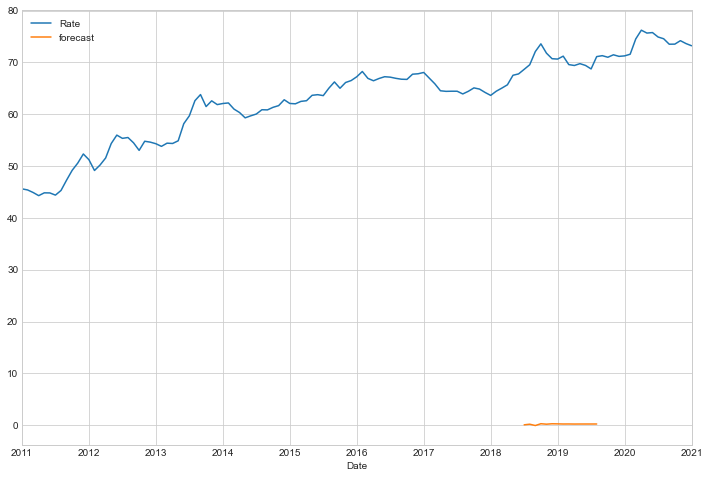

In [62]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Rate','forecast']].plot(figsize=(12,8))

<AxesSubplot:xlabel='Date'>

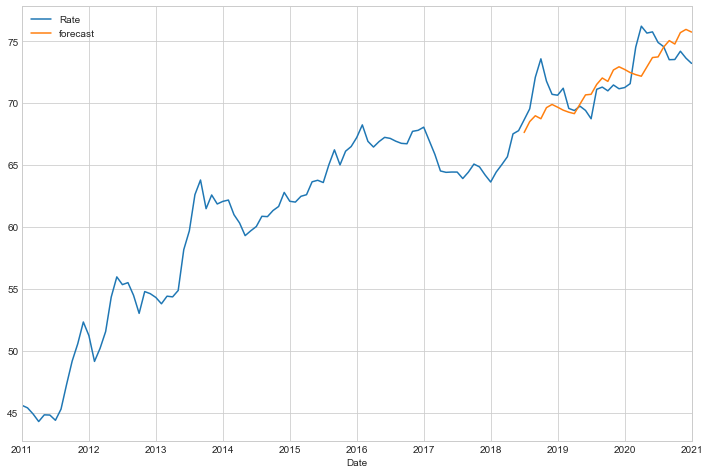

In [63]:
model=sm.tsa.statespace.SARIMAX(df['Rate'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df['forecast']=results.predict(start=90,end=120,dynamic=True)
df[['Rate','forecast']].plot(figsize=(12,8))

### `LJUNG BOX TEST`

In [64]:
res = sm.tsa.ARMA(results.resid, (1,1)).fit(disp=-1)

In [65]:
sm.stats.acorr_ljungbox(results.resid, lags=[12], return_df=True, boxpierce = True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
12,23.333413,0.025025,20.73596,0.054383


If The p_value is less than 0.05 so, we can reject the Ho. (The residuals are independently distributed.)

H0: The residuals are independently distributed.

HA: The residuals are not independently distributed; they exhibit serial correlation.

### `Weighted Movig Average`

### `Creating train and test set `

In [66]:
train=df[0:90] 
test=df[90:120]

In [67]:
weights = np.arange(1,11) #this creates an array with integers 1 to 10 included
weights

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [68]:
wma10 = train['Rate'].rolling(10).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
wma10.head(20)

Date
2011-01-31          NaN
2011-02-28          NaN
2011-03-31          NaN
2011-04-30          NaN
2011-05-31          NaN
2011-06-30          NaN
2011-07-31          NaN
2011-08-31          NaN
2011-09-30          NaN
2011-10-31    46.033525
2011-11-30    46.937469
2011-12-31    48.071127
2012-01-31    48.878840
2012-02-29    49.192355
2012-03-31    49.609783
2012-04-30    50.176372
2012-05-31    51.126726
2012-06-30    52.191760
2012-07-31    52.949052
2012-08-31    53.588857
Freq: M, Name: Rate, dtype: float64

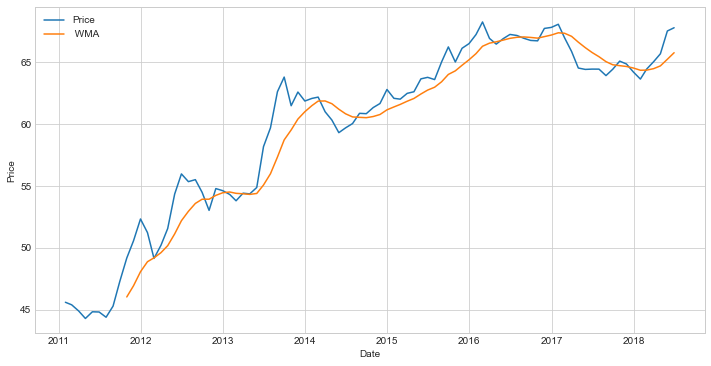

In [69]:
plt.figure(figsize = (12,6))
plt.plot(train['Rate'], label="Price")
plt.plot(wma10, label=" WMA")

plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

### `simple Exponential Smoothening`

### `Creating train and test set `

In [70]:
train=df[0:90] 
test=df[90:120]

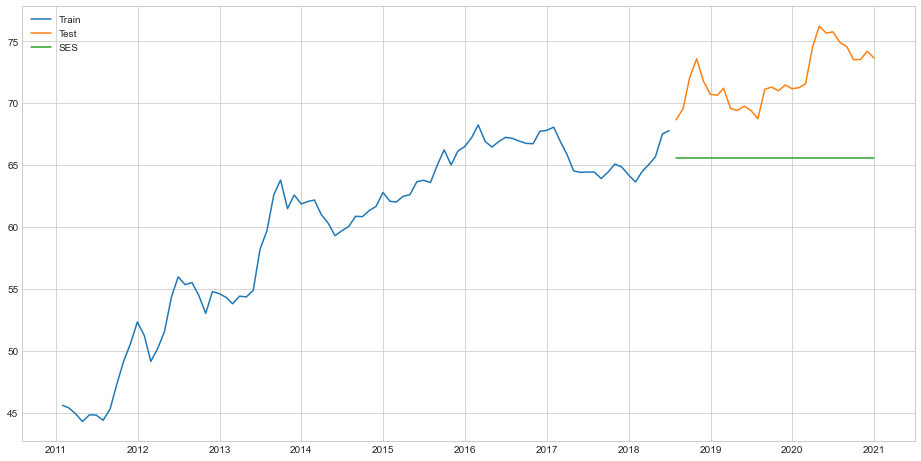

In [91]:
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Rate'])).fit(smoothing_level=0.1,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Rate'], label='Train')
plt.plot(test['Rate'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [93]:
rms = sqrt(mean_squared_error(test.Rate, y_hat_avg.SES))
print('RMSE:', rms)

RMSE: 6.819639171420463


### `Holt's Winter Method`

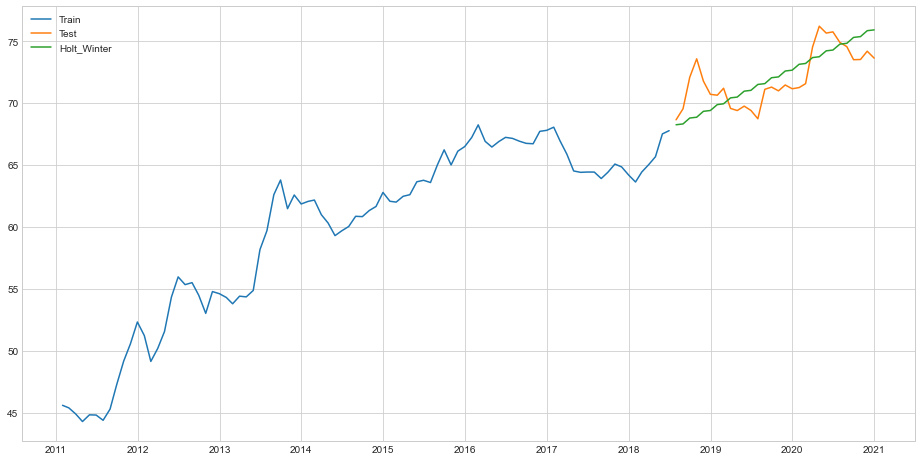

In [104]:
y_hat_avg = test.copy()
fit = ExponentialSmoothing(np.asarray(train['Rate']) ,seasonal_periods=2,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Rate'], label='Train')
plt.plot(test['Rate'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

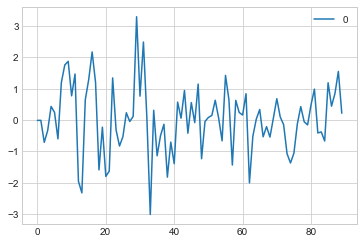

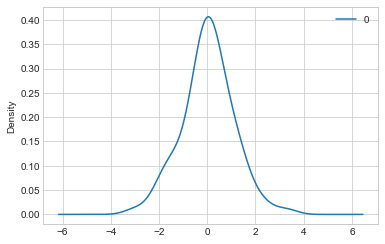

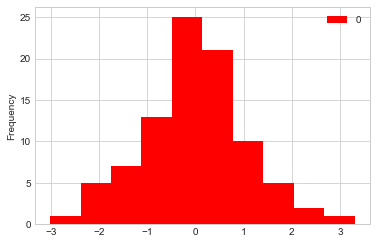

               0
count  90.000000
mean    0.027581
std     1.075111
min    -3.012895
25%    -0.533086
50%     0.059316
75%     0.645393
max     3.298850


In [105]:
residuals = DataFrame(fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

residuals.plot(kind = 'hist', color = 'red')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [101]:
rms = sqrt(mean_squared_error(test.Rate, y_hat_avg.Holt_Winter))
print('RMSE:', rms)

RMSE: 2.313176927684259


In [76]:
y_hat_avg

,Rate,forecast,Holt_Winter
Date,,,
2018-07-31,68.659355,67.632528,67.735212
2018-08-31,69.549032,68.516278,67.774522
2018-09-30,72.092333,68.984799,68.409368
2018-10-31,73.583871,68.745457,68.882739
2018-11-30,71.782667,69.641850,69.210402
2018-12-31,70.716452,69.898083,69.345940
2019-01-31,70.644839,69.676993,69.006382
2019-02-28,71.207778,69.437380,68.992140
2019-03-31,69.578710,69.273797,69.031450


In [77]:
res = sm.tsa.ARMA(results.resid, (1,1)).fit(disp=-1)

In [78]:
sm.stats.acorr_ljungbox(results.resid, lags=[12], return_df=True, boxpierce = True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
12,23.333413,0.025025,20.73596,0.054383


If The p_value is less than 0.05 so, we can reject the Ho. (The residuals are independently distributed.)

H0: The residuals are independently distributed.

HA: The residuals are not independently distributed; they exhibit serial correlation.

### `AUTO CORRELATION AND PARTIAL AUTO CORRELATION PLOT` 

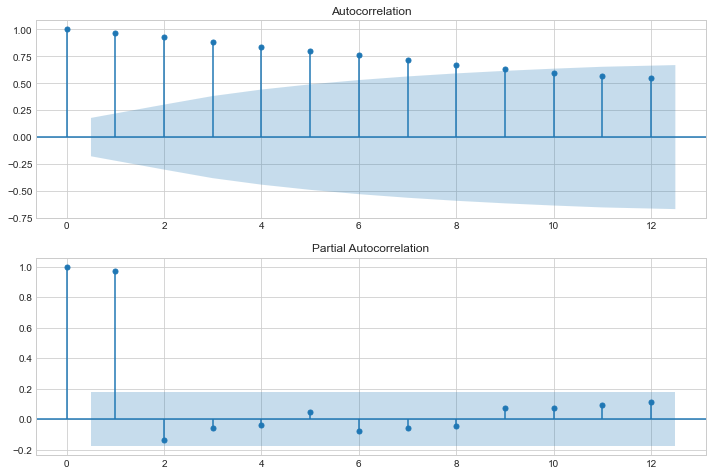

In [81]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Rate'],lags=12,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Rate'],lags=12,ax=ax2)

### `AUTO CORREALTION PLOT`

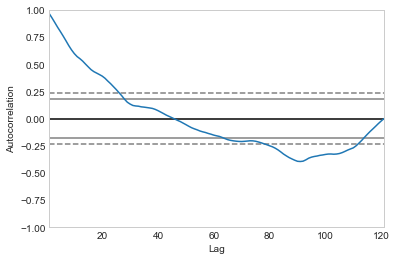

In [80]:
autocorrelation_plot(df['Rate'])
plt.show()

### `     --  ---- ---- ----- ----- --- ----- ------ ------ ------ ----- -Thank You from My Team`